# 5. Einführung in die Data Science

Dieser Abschnitt soll grundlegendes Wissen im Umgang mit `Pandas` vermitteln.

"pandas ist eine Programmbibliothek für die Programmiersprache Python, die Hilfsmittel für die Verwaltung von Daten und deren Analyse anbietet. Insbesondere enthält sie Datenstrukturen und Operatoren für den Zugriff auf numerische Tabellen und Zeitreihen." (Wikipedia)

Speziell im Bereich Data Science wird `Pandas` sehr häufig eingesetzt und erleichtert in vielerlei Hinsicht den Umgang mit großen Datenmengen.

`Pandas` baut auf das Erweiterungsmodul `NumPy` (Numerisches Python) auf. `NumPy` bereichert die Programmiersprache um mächtige Datenstrukturen und hilfreiche mathematische Funktionen, die vor allem den Umgang mit Arrays, Listen und Matrizen erleichtern sollen.<br>

Stelle vorher sicher, dass du `Pandas`, `Numpy` und `Matplotlib` installiert hast. Gebe dafür folgende Befehle ein und führe die Zeilen aus:
* pip install pandas
* pip install numpy
* pip install matplotlib

## 5.1 `Series` und `Dataframes`

Wir beginnen mit den wichtigsten Datenstrukturen im Umgang mit `Pandas`.

__a) `Series`__<br>
`Series` sind vergleichbar zu zwei eindimensionalen Arrays, wobei das erste Array den Index darstellt und das zweite Array die Werte enthält:

In [1]:
import pandas as pd #pd ist die Abkürzung, mit der Pandas nun genutzt werden kann.
serie1 = pd.Series([4,9,3,12])
print(serie1)

0     4
1     9
2     3
3    12
dtype: int64


Wir können auf Indizes und Werte zugreifen:

In [2]:
print(serie1.index)
print(serie1.values)

RangeIndex(start=0, stop=4, step=1)
[ 4  9  3 12]


Weitere Methoden findest du, indem Sie `series1.` schreiben und dann `TAB` betätigen.

Du kannst Indizes selbst definieren.<br>
Außerdem lassen sich zwei `Series` zusammenführen. Weichen die Indizes dabei teilweise voneinander ab, werden die kritischen Zeilen im zusammengeführten `Series`-Objekt mit `NaN` ausgefüllt.

In [3]:
fruits = ['peaches', 'oranges', 'cherries', 'pears']
fruits2 = ['raspberries', 'oranges', 'cherries', 'pears']
S = pd.Series([20, 33, 52, 10], index=fruits)
S2 = pd.Series([17, 13, 31, 32], index=fruits2)
serie = S + S2
print(serie)

cherries       83.0
oranges        46.0
peaches         NaN
pears          42.0
raspberries     NaN
dtype: float64


Um auf verschiedene Werte zuzugreifen kann man entweder die Stelle (also eine Zahl) eingeben oder man nutzt den definierten Indize:

In [4]:
print(serie[1])
print(serie["oranges"])

46.0
46.0


__b) `Dataframes`__

Diese Datenstruktur eignet sich dafür, Tabellen zu erstellen bzw. mit ihnen zu arbeiten.
Man kann `Dataframes` auf verschiedene Weisen initialisieren.<br>
Zum einen kann man mehrere `Series` zu einem `Dictionary` zusammenführen:

In [5]:
import pandas as pd
years = range(2014, 2018)
shop1 = pd.Series([2409.14, 2941.01, 3496.83, 3119.55], index=years)
shop2 = pd.Series([1203.45, 3441.62, 3007.83, 3619.53], index=years)
shop3 = pd.Series([3412.12, 3491.16, 3457.19, 1963.10], index=years)

In [6]:
shops_df = pd.concat([shop1, shop2, shop3], axis=1)
print(shops_df)

            0        1        2
2014  2409.14  1203.45  3412.12
2015  2941.01  3441.62  3491.16
2016  3496.83  3007.83  3457.19
2017  3119.55  3619.53  1963.10


Zum anderen lässt sich ein `Dataframe` aus einem `Dictionary` erzeugen:<br>
Im folgenden wird jeder Stadt (`Key`) ihre Einwohnerzahl und eine Sehenswürdigkeit (`Values`) zugeordnet. Diese Werte werden in einem `Dictionary` gespeichert. Danach wird das `Dictionary` in ein `Dataframe` umgewandelt. Diese Umwandlung bietet dem Programmierer jetzt mehr Möglichkeiten, Daten besser zu analysieren oder zu bearbeiten.

In [7]:
cities = {"London":    [8615246, "London Eye"],
          "Berlin":    [3562166, "Berliner Tor"],
          "Rome":      [2874038, "Kolosseum"],
          "Paris":     [2273305, "Eiffelturm"]} #Datenstruktur
city_frame = pd.DataFrame(cities)
print(city_frame)

       London        Berlin       Rome       Paris
0     8615246       3562166    2874038     2273305
1  London Eye  Berliner Tor  Kolosseum  Eiffelturm


In [8]:
london_einwohner = cities.get("London")[0]
print(london_einwohner)

8615246


Die beiden Datenstrukturen lassen sich in die jeweils andere Struktur umwandeln:

In [9]:
cities_series = pd.Series(cities) #dict --> series
print(cities_series)
print(cities_series.to_frame()) #series --> dataframe

#Alternative:
cities_dict = cities_series.to_dict() #series --> dict
city_frame = pd.DataFrame(cities_dict) #dict --> dataframe
print(city_frame)

London      [8615246, London Eye]
Berlin    [3562166, Berliner Tor]
Rome         [2874038, Kolosseum]
Paris       [2273305, Eiffelturm]
dtype: object
                              0
London    [8615246, London Eye]
Berlin  [3562166, Berliner Tor]
Rome       [2874038, Kolosseum]
Paris     [2273305, Eiffelturm]
       London        Berlin       Rome       Paris
0     8615246       3562166    2874038     2273305
1  London Eye  Berliner Tor  Kolosseum  Eiffelturm


In [10]:
cities_list = cities_series.values.tolist() #series --> list
print(cities_list)

[[8615246, 'London Eye'], [3562166, 'Berliner Tor'], [2874038, 'Kolosseum'], [2273305, 'Eiffelturm']]


In [11]:
cities_list = city_frame.values.tolist() #dataframe --> list
print(cities_list)

[[8615246, 3562166, 2874038, 2273305], ['London Eye', 'Berliner Tor', 'Kolosseum', 'Eiffelturm']]


In [12]:
series1 = city_frame.iloc[0,:] #dataframe --> series
print(type(series1))
print(series1)

<class 'pandas.core.series.Series'>
London    8615246
Berlin    3562166
Rome      2874038
Paris     2273305
Name: 0, dtype: object


Weitere nützliche Informationen zu `Series` und `DataFrames` findest du auf https://www.python-kurs.eu/pandas.php und https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html.

## 5.2 `Numpy`

`Numpy` ist ein Akronym für "Numerisches Python". Es ist ein Erweiterungsmodul, das Python um mächtige Datenstrukturen für das effiziente Rechnen mit großen Arrays und Matrizen ergänzt. Die Implementierung zielt sogar auf extrem große (*big data*) Matrizen und Arrays. `SciPy` (Scientific Python) wird oft im gleichen Atemzug wie `NumPy` genannt. `SciPy` erweitert die Leistungsfähigkeit von NumPy um weitere nützliche Funktionen, wie zum Beispiel Minimierung, Regression, Fouriertransformation und vielen anderen.<br>
Sowohl `NumPy` als auch `SciPy` sind üblicherweise bei einer Standardinstallation von Python nicht installiert. `NumPy` sowie all die anderen erwähnten Module sind jedoch Bestandteil der `Anaconda`-Distribution.<br>
Ferner bietet das Modul eine riesige Anzahl von hochwertigen mathematischen Funktionen, um mit diesen Matrizen und Arrays zu arbeiten:<br>

In [13]:
import numpy as np
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 
           21.8, 21.3, 20.9, 20.1]
a = np.array(cvalues) #wandelt eine Liste in ein Array um
print(a)
print(a.max()) #liefert das Maximum des Numpy-Arrays
print(a.sum()) #liefert die Summe des Numpy-Arrays
d = np.eye(5)  #erzeugt eine 5x5 Einheitsmatrix (einsen auf der Diagonalen)
print(d.shape) #liefert Dimension der Matrix
d[2,3] = 4     #ändert Matrixeintrag
d[4,0] = 9
print(d)

[20.1 20.8 21.9 22.5 22.7 21.8 21.3 20.9 20.1]
22.7
192.1
(5, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 4. 0.]
 [0. 0. 0. 1. 0.]
 [9. 0. 0. 0. 1.]]


`Numpy` unterstützt Slicing und verschiedene Filtermethoden:

In [14]:
b = d[:5, 0:3]
print(b)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [9. 0. 0.]]


In [15]:
bool_index = (d > 2)
print(bool_index)
print(d[d > 2])

[[False False False False False]
 [False False False False False]
 [False False False  True False]
 [False False False False False]
 [ True False False False False]]
[4. 9.]


Mit `Numpy` lassen sich Matrixoperationen leicht durchführen:

In [16]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
b = np.array([[2],[3]])

print(x*y) #elementweise Multiplikation
print(x.dot(y)) #Matrixmultiplikation
inv_x = np.linalg.inv(x) #liefert die zu x inverse Matrix
solution = inv_x.dot(b)
print(solution)

[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]
[[-1. ]
 [ 1.5]]


Außerdem lassen sich auf diese Weise die einzelnen Matrizen zusammenführen:

In [17]:
z = np.append(x,y)
r = np.concatenate((x,y))
print(z)
print(r)

[1 2 3 4 5 6 7 8]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


## 5.3 `Matplotlib`

`Matplotlib` ist eine Programmbibliothek, die es erlaubt, mathematische Darstellungen aller Art anzufertigen.

In [18]:
import matplotlib.pyplot as plt
cvalues = [20.1, 20.8, 21.9, 22.5, 22.7, 
           21.8, 21.3, 20.9, 20.1]
a = np.array(cvalues)
plt.plot(a) #liefert eine Kurve
plt.show()

<Figure size 640x480 with 1 Axes>

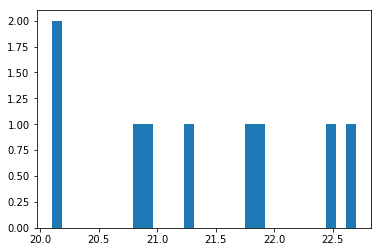

In [19]:
plt.hist(a,bins=30) #liefert ein Histogramm
plt.show()

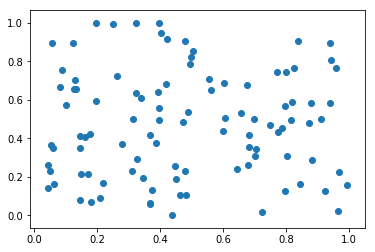

In [20]:
from numpy.random import rand
a = rand(100)
b = rand(100)
plt.scatter(a,b) #liefert ein Streudiagramm
plt.show()

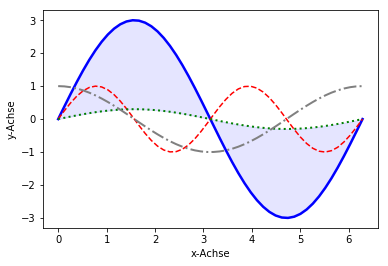

In [21]:
import matplotlib.pyplot as plt
X = np.linspace(0, 2 * np.pi, 50, endpoint=True) #gibt Werte der x-Achse an; von 0 bis 2*PI mit Genauigkeit 50
#unterschiedliche Sinus und Cosinus-Funktionen:
F1 = 3 * np.sin(X)
F2 = np.sin(2*X)
F3 = 0.3 * np.sin(X)
F4 = np.cos(X)
#Linienstile:
plt.plot(X, F1, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, F2, color="red", linewidth=1.5, linestyle="--")
plt.plot(X, F3, color="green", linewidth=2, linestyle=":")
plt.plot(X, F4, color="grey", linewidth=2, linestyle="-.")
#Achsenbeschriftung:
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
#Flächen einfärben
plt.fill_between(X, F1, F3, color="blue", alpha=.1) #färbt die Fläche zwischen den Funktionen F1 und F3 ein
plt.show()

Ausführlichere Informationen erhälst du unter: https://matplotlib.org/tutorials/index.html.

## 5.4 Umgang mit Daten in `Pandas`

### 5.4.1 Daten einlesen

Im Git-Repository im Ordner `data` finden Sie die Zip-Datei `Data`. Bitte laden Sie sich die Datei herunter und entpacken Sie sie. Die darin enthaltenen Datensätze werden wir im Laufe des Tutorials immer wieder verwenden.
Die einzelnen Datensätze sind als `csv`-Dateien gespeichert.

Hier wirst du lernen, wie man Daten mit `Pandas` einließt und diese bearbeitet:

Um `Pandas` nutzen zu können, muss das Tool zunächst importiert werden.<br>
In den folgenden Zelle siehst Du, wie man eine `csv`-Datei einliest. Einiges muss hier beachtet werden:
* Wird die `csv`-Datei über `Exel` erstellt, kann es sein, dass als Trennzeichen ein Semikolon (`;`) genutzt wird. Um die Tabelle trotzdem in gewünschter Form zu erstellen setzt man den `delimiter` als Semikolon (2. Zeile).
* `Pandas` geht davon aus, dass die erste Zeile die Spaltennamen enthält.
* Der Pfad der Datei kann auf zwei Weisen angegeben werden. In der Alternative sieht man, dass vor dem String ein `r` stehen muss. Das erzeugt einen `raw-string`, da sonst ein `unicode error` entsteht (wegen `\U`).

Das `os`-Modul in Python ermöglicht es, den Directory-Pfad des aktuellen Skripts zurückzugeben.

In [19]:
import os
path = os.getcwd()
print(path)

C:\Users\lkaiser9166\Documents\Python_Tutorial\Teil_2_Einfuehrung_in_die_DataScience


Um einen Ebene nach oben zu gehen, benutzt man folgenden Befehl:

In [20]:
path = os.path.dirname(os.getcwd())
print(path)

C:\Users\lkaiser9166\Documents\Python_Tutorial


<b>Einbinden einer `csv`-Datei:</b>

In [ ]:
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))+r"\Repositories\Python_Tutorial\data\Medikamente.csv"

In [10]:
import pandas as pd
df = pd.read_csv(path, delimiter = ";") #speichert die csv-Datei als Dataframe

In [29]:
#Alternative:
#df2 = pd.read_csv(r"<filepath>\Data\Medikamente.csv", delimiter = ";")

### 5.4.2 Daten mergen

Um Daten zu mergen, muss man folgende Vorüberlegungen treffen:
1. `merge` (Methode): Wird verwendet, wenn 2 Objekte verknüpft werden und der `Join` über die Spalten erfolgen soll.
2. `join` (Methode): Wird verwendet, wenn 2 Objekte verknüpft werden und der `Join` über die Indizes erfolgen soll.
3. `concat` (Funktion): Wird verwendet, wenn mehr als 2 Objekte verknüpft werden.
4. `append`: (Methode): Wie `concat` da keine Erweiterung der Funktionalität. Dient als Shortcut von `concat`.

<b>1. `merge`</b>

In [46]:
left = pd.read_csv("../Datensammlung/Data/Artikel.csv", delimiter = ";")
right = pd.read_csv("../Datensammlung/Data/Verkauf.csv", delimiter = ";")

#führt als Default-Wert einen Innerjoin durch
merge = pd.merge(left,right) 
print(merge.head())

#Alternativ kann man auch den Schnittpunkt von Schlüsseln aus zwei Dataframes angeben
merged_inner = pd.merge(left=left, right=right, left_on='Artikel_ID', right_on='Artikel_ID')
print(merged_inner.head())

  Artikel_ID Warengruppe       Datum     Kunde  Menge
0  Artikel_1           A  2015-01-28  Kunde_18      3
1  Artikel_1           A  2015-02-12   Kunde_2      3
2  Artikel_1           A  2015-02-26  Kunde_19      1
3  Artikel_1           A  2015-03-06  Kunde_28      2
4  Artikel_1           A  2015-03-10  Kunde_22      1
  Artikel_ID Warengruppe       Datum     Kunde  Menge
0  Artikel_1           A  2015-01-28  Kunde_18      3
1  Artikel_1           A  2015-02-12   Kunde_2      3
2  Artikel_1           A  2015-02-26  Kunde_19      1
3  Artikel_1           A  2015-03-06  Kunde_28      2
4  Artikel_1           A  2015-03-10  Kunde_22      1


Über einen `outer-join` können wir neue Spalten hinzufügen.

In [47]:
from datetime import date

df_newItems = pd.DataFrame({'Artikel_ID': ["Artikel_103"],'Warengruppe': ["F"]})
new_left = left.merge(df_newItems,how='outer')
new_left.tail()

,Artikel_ID,Warengruppe
96,Artikel_97,B
97,Artikel_98,E
98,Artikel_99,D
99,Artikel_100,D
100,Artikel_103,F


<b>2. `join`</b><br>
`join` verknüpft Daten nicht aufgrund von Spalten, sondern aussschließlich am `Index`. Die nach dem `merge` vorgenommene Deklaration der Spalte `ID` als `Index`, müssen wir – wenn wir `join` verwenden wollen – nun im Vorfeld erledigen. Dies ist der entscheidende Unterschied zwischen `merge` und `join` ist.

In [48]:
left_index = left.set_index('Artikel_ID')
right_index = right.set_index('Artikel_ID')
print(right_index.join(left_index,how='right').head())
print(right_index.join(left_index,how='right').tail())

                 Datum     Kunde  Menge Warengruppe
Artikel_ID                                         
Artikel_1   2015-01-28  Kunde_18      3           A
Artikel_1   2015-02-12   Kunde_2      3           A
Artikel_1   2015-02-26  Kunde_19      1           A
Artikel_1   2015-03-06  Kunde_28      2           A
Artikel_1   2015-03-10  Kunde_22      1           A
                 Datum     Kunde  Menge Warengruppe
Artikel_ID                                         
Artikel_99  2018-11-27  Kunde_25      1           D
Artikel_99  2018-11-28       NaN      2           D
Artikel_99  2018-11-30   Kunde_2     -1           D
Artikel_99  2018-12-12  Kunde_19      2           D
Artikel_99  2018-12-18  Kunde_27      2           D


<b>3. `concat`</b><br>
Die `concat`-Funktion ermöglicht es, mehrere Datensätze gleichzeitig zu verketten.<br>
* Durch den Befehl "axis = 1" werden die DataFrames spaltenweise angehängt.
* Durch den Befehl "axis = 0" werden die DataFrames zeilenweise verkettet.

In [49]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],columns=['letter', 'number'])

print(pd.concat([df1,df2],axis=1))
print(pd.concat([df1,df2],axis=0))

  letter  number letter  number
0      a       1      c       3
1      b       2      d       4
  letter  number
0      a       1
1      b       2
0      c       3
1      d       4


Werden `DataFrames` mit überlappenden Spalten zusammengeführt, sieht es wie folgt aus:

In [50]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']], columns=['letter', 'number', 'animal'])
print(pd.concat([df1,df3],axis=0,sort=False))

  letter  number animal
0      a       1    NaN
1      b       2    NaN
0      c       3    cat
1      d       4    dog


<b>4. `append`</b><br>
Die Methode append hängt Daten immer zeilenbasiert aneinander. Sie ist als Shortcut von `concat` zu verstehen und stellt keine Erweiterung zu irgendeiner der oben genannten Methoden/Funktionen dar. Analog zu `concat` kann auch `append` beliebig viele Objekte entgegennehmen und sie miteinander verknüpfen.

In [51]:
df3.append([df1,df2],sort="False")

,animal,letter,number
0,cat,c,3
1,dog,d,4
0,NaN,a,1
1,NaN,b,2
0,NaN,c,3
1,NaN,d,4


Weitere Informationen zu diesem Abschnitt findest du unter: https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html#data-manipulations

### 5.4.3 Daten bearbeiten

`Dataframes` unterstützen jetzt viele nützliche Methoden:<br>
* `df.head()` zeigt den oberen Bereich des `Dataframes` an, mit `df.tail()` den unteren Bereich
* mit `len(df)` sehen Sie, wie viele Zeilen die Tabelle besitzt
* über eine eckige Klammer können Sie auf einzelne Spalten zugreifen:

In [52]:
df = pd.read_csv("../Datensammlung/Data/Medikamente.csv", delimiter = ";")
print(df["Patient"].head())

0    Patient_26
1    Patient_24
2    Patient_17
3    Patient_11
4    Patient_22
Name: Patient, dtype: object


Um auf einzelne Zeilen per Zahlenindex zuzugreifen, benötigst du die Methode `.iloc`:

In [53]:
zeile = df.iloc[0]
print(zeile)
print(df.iloc[1][1])
print("Der Patient wurde am "+zeile[0]+" behandelt.")

Datum      2015-10-28
Arzt            Dr. C
Patient    Patient_26
Menge               1
Name: 0, dtype: object
Dr. C
Der Patient wurde am 2015-10-28 behandelt.


Um auf einzelne Zeilen per Eintrag zuzugreifen, benötigst du die Methode `.loc`:

In [54]:
df.loc[df["Patient"]=="Patient_26"]

,Datum,Arzt,Patient,Menge
0,2015-10-28,Dr. C,Patient_26,1
61,2018-05-11,Dr. E,Patient_26,2
82,2017-07-27,Dr. A,Patient_26,1
111,2016-12-25,Dr. E,Patient_26,2
140,2017-06-16,Dr. A,Patient_26,1
243,2017-05-31,Dr. A,Patient_26,2
284,2017-01-10,Dr. D,Patient_26,1


Um dann noch auf eine einzelne Spalte zuzugreifen, schreibe:

In [55]:
df.loc[df["Patient"]=="Patient_26","Menge"]

0      1
61     2
82     1
111    2
140    1
243    2
284    1
Name: Menge, dtype: int64

Um auf einzelne Spalten zuzugreifen, schreibe:

In [56]:
print(df[["Arzt","Patient"]].head())

    Arzt     Patient
0  Dr. C  Patient_26
1  Dr. C  Patient_24
2  Dr. D  Patient_17
3  Dr. B  Patient_11
4  Dr. C  Patient_22


Die Methode `.iloc` unterstützt slicing. So kannst du bestimme Bereiche im `Dataframe` herausfiltern:

In [57]:
print(df.iloc[2:4])

        Datum   Arzt     Patient  Menge
2  2017-09-30  Dr. D  Patient_17      1
3  2016-07-15  Dr. B  Patient_11      2


Du kannst Spalten und Zeilen einfügen bzw. ändern:

In [ ]:
df["Versicherung"] = "privat"  #fügt eine neue Spalte hinzu
print(df.head())

In [ ]:
df.loc[300,:] = ["2018-01-30","Dr. W","Patient_102",2,"privat"] #fügt eine neue Zeile hinzu
print(df.tail())

Wie du sehen kannst hat sich in der Spalte `Menge` der Datentyp zu einem `float` geändert. Um diese Spalte mit `int`-Werten zu erhalten schreibt man:

In [ ]:
df2 = df["Menge"].astype('int')
print(df2.tail())

In [ ]:
df.iloc[2] = ["2018-01-29","Dr. Y","Patient_2",3,"familienversichert"] #ändert eine bestehende Zeile
print(df.head())

In [ ]:
df["Versicherung"] = "keine Angabe" #ändert eine bestimmte Spalte
print(df.head())

Du kannst außerdem Zeilen oder Spalten löschen. Dafür gibt es zwei Möglichkeiten. 
Bei der `.drop`-Methode  ist es möglich, Spalten (`axis=1`) oder Zeilen (`axis=0`) zu löschen.

In [ ]:
df = df.drop("Menge", axis=1) #löscht Spalte
print(df.head())

In [ ]:
del df["Datum"] #löscht ebenfalls Spalte
print(df.head())

In [ ]:
df = df.drop(3, axis=0) #löscht die dritte Zeile
print(df.head())

Unter diesem Link findest du die Dokumentation zu `Pandas`: https://pandas.pydata.org/pandas-docs/stable/